In [105]:
import pandas as pd
import numpy as np
import collections
import witwidget
import os, glob


from matplotlib import pyplot
from numpy import loadtxt
from matplotlib import pyplot


from numpy import loadtxt
from numpy import sort
from sklearn.svm import SVC 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectFromModel
 
    
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.utils import shuffle
from witwidget.notebook.visualization import WitWidget, WitConfigBuilder

In [106]:
# Set column dtypes for Pandas
from datetime import datetime
dt = datetime.utcnow()
COLUMN_NAMES = collections.OrderedDict({
  'Gmt time': object,
  'Open': np.float64,
  'High': np.float64,
  'Low': np.float64,
  'Close': np.float64,
  'Volume': np.float64,
  'Open_Bid': np.float64,
  'High_Bid': np.float64,
  'Low_Bid': np.float64,
  'Close_Bid': np.float64,
  'Volume_Bid': np.float64,
  'Spread': np.float64,
  'day_name': object,
  'weekday': 'category',#'category'np.int64
  'Pct_Range_Close': np.float64,
  'Pct_Range_Close_diff': np.float64,
  'MA_Close_5': np.float64,
  'MA_Close_25': np.float64,
  'MA_Close_50': np.float64,
  'MA_Close_200': np.float64,
  'EMA_Close_5': np.float64,
  'Momentum_1': np.float64,
  'Momentum_2': np.float64,
  'Momentum_5': np.float64,
  'Momentum_24': np.float64,
  'rsi': np.float64,
  'Rolling_Mean25': np.float64,
  'Bollinger_High': np.float64,
  'Bollinger_Low': np.float64,
  'PP': np.float64,
  'R1': np.float64,
  'S1': np.float64,
  'R2': np.float64,
  'S2': np.float64,
  'R3': np.float64,
  'S3': np.float64,
  'SO%k': np.float64,
  'SO%k1': np.float64,
  'SO%d2': np.float64,
  'Trix_5': np.float64,
  'MACD_5_25': np.float64,
  'MACDsign_5_25': np.float64,
  'MACDdiff_5_25': np.float64,
  'Mass_Index_25_8_9': np.float64,
  'Class': np.float64
})

In [107]:
pwd = os.getcwd()
datasource_path = os.path.join(pwd, r'../../../Datasets/Junio2020/procesados_classification/')
filenames = glob.glob(datasource_path + "/*.csv")
filenames.sort()
for file in filenames:
    print(filenames.index(file), ' ',os.path.basename(file))

0   3C-EURUSD_FULL_1D_21F.csv
1   3C-EURUSD_FULL_1D_45F.csv
2   3C-EURUSD_FULL_1H_45F.csv
3   5C-EURUSD_FULL_1D_21F.csv
4   5C-EURUSD_FULL_1D_45F.csv
5   C-EURUSD_FULL_1D_21F.csv
6   C-EURUSD_FULL_1H_25F.csv
7   C-EURUSD_FULL_1H_45F.csv
8   C-EURUSD_FULL_1H_54F.csv


In [108]:
#SELECT an INDEX 
INDX = 1

CLASS_NUMBER = '3C'
MODEL_TYPE = 'SVM'
FRECUENCIA = '1D'
TARGET_NAME = "Class"
ID = '01'

PROFUNDIDAD = 0

TEST_SIZE = .20
VAL_SIZE = .10

In [109]:
# Load data into Pandas
data = pd.read_csv(filenames[INDX], 
  index_col=False,
  dtype=COLUMN_NAMES
)
data = data.dropna()

#data = shuffle(data, random_state=2)
data.head()

,Gmt time,Open,High,Low,Close,Volume,Open_Bid,High_Bid,Low_Bid,Close_Bid,...,S3,SO%k,SO%k1,SO%d2,Trix_5,MACD_5_25,MACDsign_5_25,MACDdiff_5_25,Mass_Index_25_8_9,Class
0,2004-01-01,1.25950,1.26052,1.24698,1.25733,4.621817e+05,1.25934,1.26035,1.24679,1.25723,...,1.235827,0.764402,0.764402,0.764402,0.0,0.0,0.0,0.0,24.730803,0.0
1,2004-01-02,1.25717,1.26282,1.25214,1.25832,1.066578e+06,1.25701,1.26263,1.25198,1.25806,...,1.242020,0.578652,0.578652,0.625089,0.0,0.0,0.0,0.0,24.730803,1.0
2,2004-01-04,1.25925,1.26487,1.25789,1.26318,6.879980e+04,1.25855,1.26477,1.25779,1.26308,...,1.252110,0.757880,0.757880,0.717021,0.0,0.0,0.0,0.0,24.730803,1.0
3,2004-01-05,1.26324,1.26935,1.26301,1.26830,1.119689e+06,1.26308,1.26924,1.26288,1.26820,...,1.258083,0.834385,0.834385,0.796242,0.0,0.0,0.0,0.0,24.730803,1.0
4,2004-01-06,1.26836,1.28093,1.26666,1.27150,1.125442e+06,1.26820,1.28083,1.26650,1.27140,...,1.250860,0.339173,0.339173,0.490270,0.0,0.0,0.0,0.0,24.730803,-1.0


In [110]:
data.columns

Index(['Gmt time', 'Open', 'High', 'Low', 'Close', 'Volume', 'Open_Bid',
       'High_Bid', 'Low_Bid', 'Close_Bid', 'Volume_Bid', 'Spread', 'day_name',
       'weekday', 'Pct_Range_Close', 'Pct_Range_Close_diff', 'MA_Close_5',
       'MA_Close_25', 'MA_Close_50', 'MA_Close_200', 'EMA_Close_5',
       'Momentum_1', 'Momentum_2', 'Momentum_5', 'Momentum_24', 'rsi',
       'Rolling_Mean25', 'Bollinger_High', 'Bollinger_Low', 'PP', 'R1', 'S1',
       'R2', 'S2', 'R3', 'S3', 'SO%k', 'SO%k1', 'SO%d2', 'Trix_5', 'MACD_5_25',
       'MACDsign_5_25', 'MACDdiff_5_25', 'Mass_Index_25_8_9', 'Class'],
      dtype='object')

In [111]:
data = data.drop(['Gmt time'], axis = 1)
data = data.drop(['day_name'], axis = 1)
#data = data.drop(['weekday'], axis = 1)
#data = data.drop(['Open_Bid'], axis = 1)
#data = data.drop(['High_Bid'], axis = 1)
#data = data.drop(['Low_Bid'], axis = 1)
#data = data.drop(['Close_Bid'], axis = 1)

#data = data.drop(['PP'], axis = 1)
#data = data.drop(['R1'], axis = 1)
#data = data.drop(['R2'], axis = 1)
#data = data.drop(['R3'], axis = 1)
#data = data.drop(['S1'], axis = 1)
#data = data.drop(['S2'], axis = 1)
#data = data.drop(['S3'], axis = 1)

#data = data.drop(['EMA_Close_5'], axis = 1)

data.head()

,Open,High,Low,Close,Volume,Open_Bid,High_Bid,Low_Bid,Close_Bid,Volume_Bid,...,S3,SO%k,SO%k1,SO%d2,Trix_5,MACD_5_25,MACDsign_5_25,MACDdiff_5_25,Mass_Index_25_8_9,Class
0,1.25950,1.26052,1.24698,1.25733,4.621817e+05,1.25934,1.26035,1.24679,1.25723,5.597896e+05,...,1.235827,0.764402,0.764402,0.764402,0.0,0.0,0.0,0.0,24.730803,0.0
1,1.25717,1.26282,1.25214,1.25832,1.066578e+06,1.25701,1.26263,1.25198,1.25806,1.277971e+06,...,1.242020,0.578652,0.578652,0.625089,0.0,0.0,0.0,0.0,24.730803,1.0
2,1.25925,1.26487,1.25789,1.26318,6.879980e+04,1.25855,1.26477,1.25779,1.26308,8.372040e+04,...,1.252110,0.757880,0.757880,0.717021,0.0,0.0,0.0,0.0,24.730803,1.0
3,1.26324,1.26935,1.26301,1.26830,1.119689e+06,1.26308,1.26924,1.26288,1.26820,1.353480e+06,...,1.258083,0.834385,0.834385,0.796242,0.0,0.0,0.0,0.0,24.730803,1.0
4,1.26836,1.28093,1.26666,1.27150,1.125442e+06,1.26820,1.28083,1.26650,1.27140,1.354807e+06,...,1.250860,0.339173,0.339173,0.490270,0.0,0.0,0.0,0.0,24.730803,-1.0


In [112]:
SIZE = data.shape[0]
NUM_FEATURES = data.shape[1]
print(SIZE)
print(NUM_FEATURES)

5137
43


In [113]:
#LOCATION TO SAVE
pwd = os.getcwd()
source_data_toSave = os.path.join(pwd, r'../../../Models/2020/SVM/')
#print('Location to Save: ', source_data)
FILENAME = CLASS_NUMBER + '_' + FRECUENCIA + '_' + str(NUM_FEATURES) + 'F_' + str(SIZE) + 'Size_' + MODEL_TYPE +  '_' + TARGET_NAME + "_"+ ID 
file_name_toSave = FILENAME + '.hdf5'
print('FILENAME: ', FILENAME)
print('File Name Model:', file_name_toSave)

FILENAME:  3C_1D_43F_5137Size_SVM_Class_01
File Name Model: 3C_1D_43F_5137Size_SVM_Class_01.hdf5


In [114]:
full_dataset_results_csv = os.path.join(pwd, r'../../../Results/SVM/' + FILENAME + '_Full.csv')
print(full_dataset_results_csv)

/Users/marami3/Documents/ITESO/IDI4/forex_prediction/Jupyter Notebooks/IDI4/models_clasification/../../../Results/SVM/3C_1D_43F_5137Size_SVM_Class_01_Full.csv


In [115]:
# Label preprocessing
labels = data['Class'].values

# See the distribution of approved / denied classes (0: denied, 1: approved)
print(data['Class'].value_counts())

 1.0    1729
 0.0    1716
-1.0    1692
Name: Class, dtype: int64


In [116]:
data = data.drop(columns=['Class'])

In [117]:
def get_2Dimension(df, RANGE):
    new_df = pd.DataFrame()
    for i in range(RANGE):
#        new_df = df
        for j in range (df.shape[1]):
            #value = df.iloc[i+1,j]
            #print(value)
            new_col_name = df.columns[j] + '_' + str(i+1)
            #print(new_col_name)
            new_df[new_col_name] = df.iloc[i+1:,j]
            #print(new_df[new_col_name].isnull().sum())
            new_df.fillna(method='backfill', inplace=True)
            #print(new_df[new_col_name].isnull().sum())
    print(new_df.columns)
    return new_df

 


In [118]:
data

,Open,High,Low,Close,Volume,Open_Bid,High_Bid,Low_Bid,Close_Bid,Volume_Bid,...,R3,S3,SO%k,SO%k1,SO%d2,Trix_5,MACD_5_25,MACDsign_5_25,MACDdiff_5_25,Mass_Index_25_8_9
0,1.25950,1.26052,1.24698,1.25733,4.621817e+05,1.25934,1.26035,1.24679,1.25723,5.597896e+05,...,1.276447,1.235827,0.764402,0.764402,0.764402,0.000000,0.000000,0.000000,0.000000,24.730803
1,1.25717,1.26282,1.25214,1.25832,1.066578e+06,1.25701,1.26263,1.25198,1.25806,1.277971e+06,...,1.274060,1.242020,0.578652,0.578652,0.625089,0.000000,0.000000,0.000000,0.000000,24.730803
2,1.25925,1.26487,1.25789,1.26318,6.879980e+04,1.25855,1.26477,1.25779,1.26308,8.372040e+04,...,1.273050,1.252110,0.757880,0.757880,0.717021,0.000000,0.000000,0.000000,0.000000,24.730803
3,1.26324,1.26935,1.26301,1.26830,1.119689e+06,1.26308,1.26924,1.26288,1.26820,1.353480e+06,...,1.277103,1.258083,0.834385,0.834385,0.796242,0.000000,0.000000,0.000000,0.000000,24.730803
4,1.26836,1.28093,1.26666,1.27150,1.125442e+06,1.26820,1.28083,1.26650,1.27140,1.354807e+06,...,1.293670,1.250860,0.339173,0.339173,0.490270,0.000000,0.000000,0.000000,0.000000,24.730803
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5132,1.09019,1.09960,1.08970,1.09787,2.219154e+05,1.09015,1.09957,1.08969,1.09784,2.075363e+05,...,1.111647,1.081947,0.825253,0.825253,0.791580,0.000717,0.004185,0.002241,0.001944,24.482205
5133,1.09788,1.10311,1.09342,1.10169,3.392159e+05,1.09785,1.10307,1.09340,1.10166,3.194905e+05,...,1.115083,1.086013,0.853457,0.853457,0.832831,0.000947,0.006008,0.002994,0.003014,24.641012
5134,1.10168,1.10937,1.09919,1.10782,2.907155e+05,1.10165,1.10934,1.09916,1.10779,2.312052e+05,...,1.121910,1.091370,0.847741,0.847741,0.842771,0.001341,0.008548,0.004105,0.004443,24.865736
5135,1.10780,1.11452,1.10702,1.11071,3.306924e+05,1.10778,1.11451,1.10698,1.11036,3.730174e+05,...,1.121980,1.099480,0.492000,0.492000,0.608924,0.001728,0.010633,0.005411,0.005222,24.866568


In [119]:
pd_old_rows = get_2Dimension(data,PROFUNDIDAD)

Index([], dtype='object')


In [120]:
pd_old_rows.shape

(0, 0)

In [121]:
data = pd.concat([data, pd_old_rows], axis=1, sort=False)
data.fillna(method='backfill', inplace=True)
data.shape

(5137, 42)

In [122]:
data.head(30)

,Open,High,Low,Close,Volume,Open_Bid,High_Bid,Low_Bid,Close_Bid,Volume_Bid,...,R3,S3,SO%k,SO%k1,SO%d2,Trix_5,MACD_5_25,MACDsign_5_25,MACDdiff_5_25,Mass_Index_25_8_9
0,1.25950,1.26052,1.24698,1.25733,4.621817e+05,1.25934,1.26035,1.24679,1.25723,5.597896e+05,...,1.276447,1.235827,0.764402,0.764402,0.764402,0.000000,0.000000,0.0,0.0,24.730803
1,1.25717,1.26282,1.25214,1.25832,1.066578e+06,1.25701,1.26263,1.25198,1.25806,1.277971e+06,...,1.274060,1.242020,0.578652,0.578652,0.625089,0.000000,0.000000,0.0,0.0,24.730803
2,1.25925,1.26487,1.25789,1.26318,6.879980e+04,1.25855,1.26477,1.25779,1.26308,8.372040e+04,...,1.273050,1.252110,0.757880,0.757880,0.717021,0.000000,0.000000,0.0,0.0,24.730803
3,1.26324,1.26935,1.26301,1.26830,1.119689e+06,1.26308,1.26924,1.26288,1.26820,1.353480e+06,...,1.277103,1.258083,0.834385,0.834385,0.796242,0.000000,0.000000,0.0,0.0,24.730803
4,1.26836,1.28093,1.26666,1.27150,1.125442e+06,1.26820,1.28083,1.26650,1.27140,1.354807e+06,...,1.293670,1.250860,0.339173,0.339173,0.490270,0.000000,0.000000,0.0,0.0,24.730803
5,1.27161,1.27417,1.26180,1.26377,1.111343e+06,1.27145,1.27404,1.26168,1.26367,1.345833e+06,...,1.283730,1.246620,0.159256,0.159256,0.269291,0.000000,0.000000,0.0,0.0,24.730803
6,1.26369,1.27854,1.25590,1.27696,1.115933e+06,1.26353,1.27839,1.25576,1.27686,1.348588e+06,...,1.307673,1.239753,0.930212,0.930212,0.710107,0.000000,0.000000,0.0,0.0,24.730803
7,1.27698,1.28676,1.27034,1.28149,1.066698e+06,1.27682,1.28665,1.27021,1.28123,1.274568e+06,...,1.305140,1.255880,0.679050,0.679050,0.689399,0.000000,0.000000,0.0,0.0,24.730803
8,1.28279,1.28572,1.28253,1.28477,7.567420e+04,1.28209,1.28559,1.28209,1.28467,8.780950e+04,...,1.289340,1.279770,0.702194,0.702194,0.697930,0.000000,0.000000,0.0,0.0,24.730803
9,1.28498,1.28971,1.27327,1.27390,1.110720e+06,1.28482,1.28956,1.27306,1.27380,1.341147e+06,...,1.301090,1.251770,0.038321,0.038321,0.258183,0.000000,0.000000,0.0,0.0,24.730803


In [123]:
# Convert categorical columns to dummy columns
dummy_columns = list(data.dtypes[data.dtypes == 'category'].index)
data = pd.get_dummies(data, columns=dummy_columns)

In [124]:
# Preview the data
data.head()

,Open,High,Low,Close,Volume,Open_Bid,High_Bid,Low_Bid,Close_Bid,Volume_Bid,...,MACD_5_25,MACDsign_5_25,MACDdiff_5_25,Mass_Index_25_8_9,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_6
0,1.25950,1.26052,1.24698,1.25733,4.621817e+05,1.25934,1.26035,1.24679,1.25723,5.597896e+05,...,0.0,0.0,0.0,24.730803,0,0,0,1,0,0
1,1.25717,1.26282,1.25214,1.25832,1.066578e+06,1.25701,1.26263,1.25198,1.25806,1.277971e+06,...,0.0,0.0,0.0,24.730803,0,0,0,0,1,0
2,1.25925,1.26487,1.25789,1.26318,6.879980e+04,1.25855,1.26477,1.25779,1.26308,8.372040e+04,...,0.0,0.0,0.0,24.730803,0,0,0,0,0,1
3,1.26324,1.26935,1.26301,1.26830,1.119689e+06,1.26308,1.26924,1.26288,1.26820,1.353480e+06,...,0.0,0.0,0.0,24.730803,1,0,0,0,0,0
4,1.26836,1.28093,1.26666,1.27150,1.125442e+06,1.26820,1.28083,1.26650,1.27140,1.354807e+06,...,0.0,0.0,0.0,24.730803,0,1,0,0,0,0


In [125]:
data.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Open_Bid', 'High_Bid',
       'Low_Bid', 'Close_Bid', 'Volume_Bid', 'Spread', 'Pct_Range_Close',
       'Pct_Range_Close_diff', 'MA_Close_5', 'MA_Close_25', 'MA_Close_50',
       'MA_Close_200', 'EMA_Close_5', 'Momentum_1', 'Momentum_2', 'Momentum_5',
       'Momentum_24', 'rsi', 'Rolling_Mean25', 'Bollinger_High',
       'Bollinger_Low', 'PP', 'R1', 'S1', 'R2', 'S2', 'R3', 'S3', 'SO%k',
       'SO%k1', 'SO%d2', 'Trix_5', 'MACD_5_25', 'MACDsign_5_25',
       'MACDdiff_5_25', 'Mass_Index_25_8_9', 'weekday_0', 'weekday_1',
       'weekday_2', 'weekday_3', 'weekday_4', 'weekday_6'],
      dtype='object')

In [126]:
# Split the data into train / test sets
x,y = data,labels
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=TEST_SIZE, random_state=42)

In [127]:
print(x.shape)
print(y.shape)

print(x_train.shape)
print(y_train.shape)

(5137, 47)
(5137,)
(4109, 47)
(4109,)


In [128]:

svm_model = SVC(kernel = 'rbf', random_state=0 ,gamma=.01, C = 1).fit(x_train, y_train) 


In [129]:
y_pred = svm_model.predict(x_test)

In [136]:
y_pred[:30]

array([-1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1.])

In [137]:
# Get predictions on the test set and print the accuracy score
y_pred = bst.predict(x_test)
acc = accuracy_score(y_test, y_pred.round())
print(acc, '\n')

0.38715953307393 



In [138]:
# Print a confusion matrix
print('Confusion matrix:')
cm = confusion_matrix(y_test, y_pred.round())
cm = cm / cm.astype(np.float).sum(axis=1)
print(cm)

Confusion matrix:
[[       nan 0.         0.         0.                nan]
 [       inf 0.33762058 0.03672316 0.04132231        inf]
 [       inf 0.25723473 0.47740113 0.21487603        inf]
 [       inf 0.03858521 0.01412429 0.3415978         inf]
 [       nan 0.         0.         0.                nan]]


/Users/marami3/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in true_divide
  after removing the cwd from sys.path.
/Users/marami3/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in true_divide
  after removing the cwd from sys.path.


[0.01419586 0.0179759  0.01397554 0.01789952 0.01614236 0.01869363
 0.02262596 0.01876102 0.0307623  0.01860817 0.0187471  0.01653889
 0.01691635 0.01970397 0.01889863 0.01890953 0.01797759 0.02027852
 0.01849152 0.01794923 0.01635279 0.01671415 0.01861028 0.02423395
 0.01851394 0.02076284 0.0206974  0.02150418 0.02546726 0.02068835
 0.02140623 0.01899195 0.02036389 0.01687377 0.         0.01795151
 0.0173113  0.019022   0.02092592 0.01692277 0.0165058  0.01772499
 0.01669657 0.01693085 0.01631563 0.13925289 0.02920722]


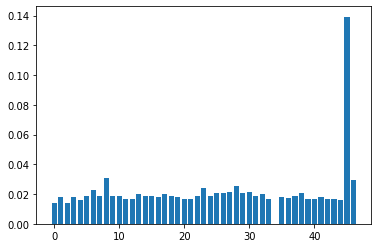

In [35]:

print(bst.feature_importances_)
pyplot.bar(range(len(bst.feature_importances_)), bst.feature_importances_)
pyplot.show()

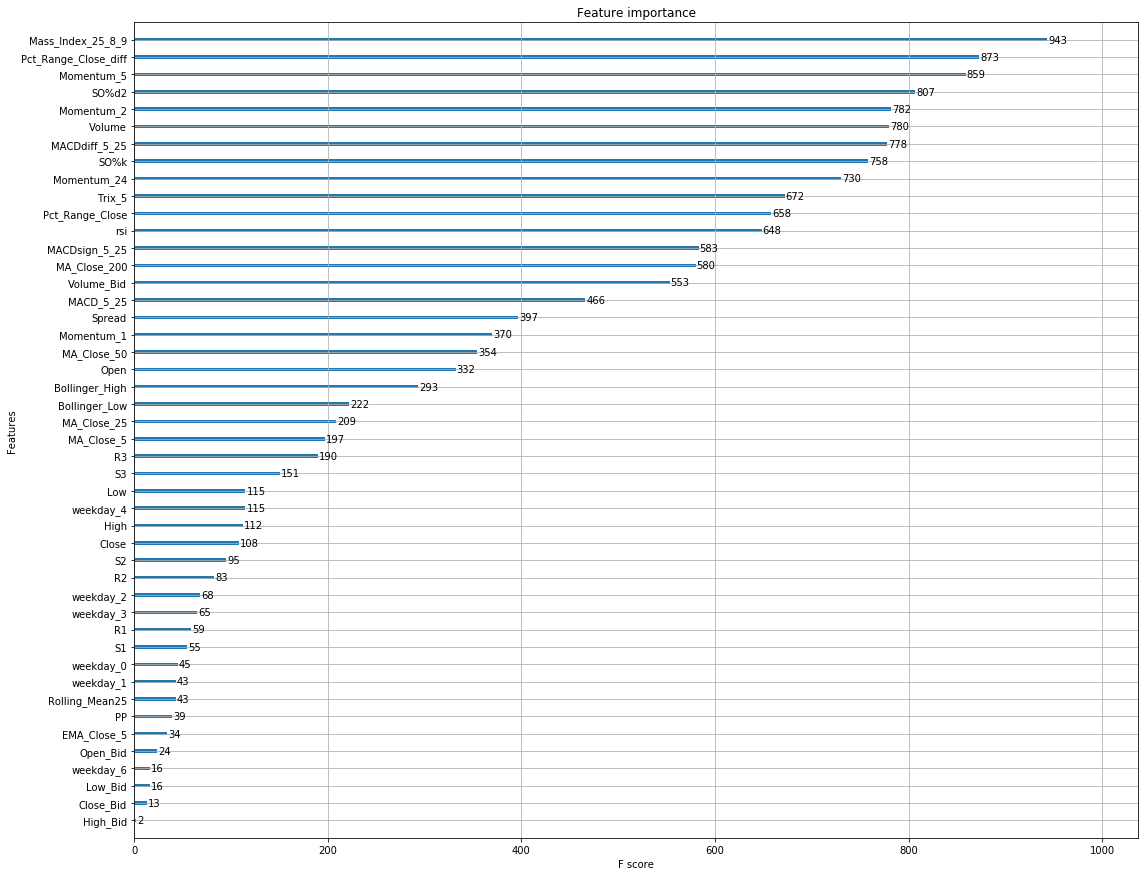

In [36]:


# plot feature importance

ax = plot_importance(bst)
fig = ax.figure
fig.set_size_inches(18, 15)
pyplot.show()

In [37]:
# define custom class to fix bug in xgboost 1.0.2
class MyXGBClassifier(XGBClassifier):
    @property
    def coef_(self):
        return None
 
# split data into X and y
x,y = data,labels
# split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=7)
# fit model on all training data
model = MyXGBClassifier()
model.fit(X_train, y_train)
# make predictions for test data and evaluate
predictions = model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
# Fit model using each importance as a threshold
thresholds = sort(model.feature_importances_)
for thresh in thresholds:
    # select features using threshold
    selection = SelectFromModel(model, threshold=thresh, prefit=True)
    select_X_train = selection.transform(X_train)
    # train model
    selection_model = XGBClassifier()
    selection_model.fit(select_X_train, y_train)
    # eval model
    select_X_test = selection.transform(X_test)
    predictions = selection_model.predict(select_X_test)
    accuracy = accuracy_score(y_test, predictions)
    print("Thresh=%.3f, n=%d, Accuracy: %.2f%%" % (thresh, select_X_train.shape[1], accuracy*100.0))

Accuracy: 27.89%
Thresh=0.000, n=47, Accuracy: 27.89%
Thresh=0.015, n=46, Accuracy: 27.89%
Thresh=0.015, n=45, Accuracy: 27.18%
Thresh=0.016, n=44, Accuracy: 27.24%
Thresh=0.016, n=43, Accuracy: 28.95%
Thresh=0.017, n=42, Accuracy: 27.77%
Thresh=0.017, n=41, Accuracy: 27.18%
Thresh=0.017, n=40, Accuracy: 28.54%
Thresh=0.017, n=39, Accuracy: 27.54%
Thresh=0.017, n=38, Accuracy: 28.60%
Thresh=0.017, n=37, Accuracy: 28.07%
Thresh=0.017, n=36, Accuracy: 28.36%
Thresh=0.017, n=35, Accuracy: 27.36%
Thresh=0.018, n=34, Accuracy: 27.54%
Thresh=0.018, n=33, Accuracy: 27.36%
Thresh=0.018, n=32, Accuracy: 28.89%
Thresh=0.018, n=31, Accuracy: 28.77%
Thresh=0.018, n=30, Accuracy: 28.48%
Thresh=0.018, n=29, Accuracy: 28.36%
Thresh=0.018, n=28, Accuracy: 27.59%
Thresh=0.018, n=27, Accuracy: 27.06%
Thresh=0.018, n=26, Accuracy: 28.66%
Thresh=0.018, n=25, Accuracy: 27.77%
Thresh=0.019, n=24, Accuracy: 28.24%
Thresh=0.019, n=23, Accuracy: 28.24%
Thresh=0.019, n=22, Accuracy: 28.60%
Thresh=0.019, n=21, A

In [38]:
yhat = bst.predict(x)

In [39]:
y_real = pd.DataFrame({'Real_Class': y})
yhat_pd = pd.DataFrame({'Predicted_Class': yhat})
print(y_real)
print(yhat_pd)

      Real_Class
0            1.0
1            2.0
2            2.0
3            1.0
4           -2.0
...          ...
5132         1.0
5133         2.0
5134         1.0
5135         1.0
5136         0.0

[5137 rows x 1 columns]
      Predicted_Class
0                 1.0
1                 1.0
2                -2.0
3                 1.0
4                -2.0
...               ...
5132              2.0
5133              2.0
5134              1.0
5135             -1.0
5136             -2.0

[5137 rows x 1 columns]


In [40]:
x_real = pd.concat([x,y_real], axis=1, sort=False)
print(x_real.shape)
print(x_real.head)

(5137, 48)
<bound method NDFrame.head of          Open     High      Low    Close        Volume  Open_Bid  High_Bid  \
0     1.25950  1.26052  1.24698  1.25733  4.621817e+05   1.25934   1.26035   
1     1.25717  1.26282  1.25214  1.25832  1.066578e+06   1.25701   1.26263   
2     1.25925  1.26487  1.25789  1.26318  6.879980e+04   1.25855   1.26477   
3     1.26324  1.26935  1.26301  1.26830  1.119689e+06   1.26308   1.26924   
4     1.26836  1.28093  1.26666  1.27150  1.125442e+06   1.26820   1.28083   
...       ...      ...      ...      ...           ...       ...       ...   
5132  1.09019  1.09960  1.08970  1.09787  2.219154e+05   1.09015   1.09957   
5133  1.09788  1.10311  1.09342  1.10169  3.392159e+05   1.09785   1.10307   
5134  1.10168  1.10937  1.09919  1.10782  2.907155e+05   1.10165   1.10934   
5135  1.10780  1.11452  1.10702  1.11071  3.306924e+05   1.10778   1.11451   
5136  1.11213  1.11217  1.11028  1.11158  1.012642e+04   1.11129   1.11195   

      Low_Bid  Close_B

In [41]:
x_full1 = pd.concat([x_real,yhat_pd], axis=1, sort=False)
print(x_full1.shape)
print(x_full1.head)

(5137, 49)
<bound method NDFrame.head of          Open     High      Low    Close        Volume  Open_Bid  High_Bid  \
0     1.25950  1.26052  1.24698  1.25733  4.621817e+05   1.25934   1.26035   
1     1.25717  1.26282  1.25214  1.25832  1.066578e+06   1.25701   1.26263   
2     1.25925  1.26487  1.25789  1.26318  6.879980e+04   1.25855   1.26477   
3     1.26324  1.26935  1.26301  1.26830  1.119689e+06   1.26308   1.26924   
4     1.26836  1.28093  1.26666  1.27150  1.125442e+06   1.26820   1.28083   
...       ...      ...      ...      ...           ...       ...       ...   
5132  1.09019  1.09960  1.08970  1.09787  2.219154e+05   1.09015   1.09957   
5133  1.09788  1.10311  1.09342  1.10169  3.392159e+05   1.09785   1.10307   
5134  1.10168  1.10937  1.09919  1.10782  2.907155e+05   1.10165   1.10934   
5135  1.10780  1.11452  1.10702  1.11071  3.306924e+05   1.10778   1.11451   
5136  1.11213  1.11217  1.11028  1.11158  1.012642e+04   1.11129   1.11195   

      Low_Bid  Close_B

In [42]:
#Save
x_full1.to_csv(full_dataset_results_csv, header=True, index=False)